# MSCA 31008 HW4
# Sijie Li

In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas
import sys

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Part 1

## Import Data

In [5]:
Ddata = pandas.read_csv(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MsCA31008 DataMining\Wk5\Diabetese Dataset Files\diabetes_data.csv')

## Replace value for 'readmitted', 'change', and 'age'

In [6]:
Ddata['readmitted'].replace(('>30', '<30'), ("YES", "YES"), inplace=True)
Ddata['change'].replace(('Ch'), ("Yes"), inplace=True)
Ddata['age'].replace(('[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'),
                    (5,15,25,35,45,55,65,75,85,95), inplace = True)
Ddata['age'] = Ddata['age'].astype('int64')
Ddata

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,15,1,1,7,3,59,...,No,No,Up,No,No,No,No,Yes,Yes,YES
1,64410,86047875,AfricanAmerican,Female,25,1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
2,500364,82442376,Caucasian,Male,35,1,1,7,2,44,...,No,No,Up,No,No,No,No,Yes,Yes,NO
3,16680,42519267,Caucasian,Male,45,1,1,7,1,51,...,No,No,Steady,No,No,No,No,Yes,Yes,NO
4,35754,82637451,Caucasian,Male,55,2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,443847548,100162476,AfricanAmerican,Male,75,1,3,7,3,51,...,No,No,Down,No,No,No,No,Yes,Yes,YES
98049,443847782,74694222,AfricanAmerican,Female,85,1,4,5,5,33,...,No,No,Steady,No,No,No,No,No,Yes,NO
98050,443854148,41088789,Caucasian,Male,75,1,1,7,1,53,...,No,No,Down,No,No,No,No,Yes,Yes,NO
98051,443857166,31693671,Caucasian,Female,85,2,3,7,10,45,...,No,No,Up,No,No,No,No,Yes,Yes,NO


In [7]:
Ddata.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

## Check All Categorical Variables

In [8]:
# checking features
cat = Ddata.select_dtypes(include='O').keys()
# display variabels
cat

Index(['race', 'gender', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum',
       'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

## Check Unique Value in Each Column

In [9]:
# unique values in each columns
for x in Ddata.columns:
    #prinfting unique values
    print(x ,':', len(Ddata[x].unique()))

encounter_id : 98053
patient_nbr : 68630
race : 5
gender : 3
age : 10
admission_type_id : 8
discharge_disposition_id : 26
admission_source_id : 17
time_in_hospital : 14
num_lab_procedures : 118
num_procedures : 7
num_medications : 75
number_outpatient : 39
number_emergency : 33
number_inpatient : 20
diag_1 : 713
diag_2 : 740
diag_3 : 786
number_diagnoses : 14
max_glu_serum : 4
A1Cresult : 4
metformin : 4
repaglinide : 4
nateglinide : 4
chlorpropamide : 4
glimepiride : 4
acetohexamide : 2
glipizide : 4
glyburide : 4
tolbutamide : 2
pioglitazone : 4
rosiglitazone : 4
acarbose : 4
miglitol : 4
troglitazone : 2
tolazamide : 3
insulin : 4
glyburide-metformin : 4
glipizide-metformin : 2
glimepiride-pioglitazone : 2
metformin-pioglitazone : 2
change : 2
diabetesMed : 2
readmitted : 2


## Convert Diag Columns into Fewer Categories Function

In [10]:
# convert diag_1 into 9 cat
def convert_diag_codes(code):
#     print (code, type(code))
    if (pandas.isnull(code)):
        return 'Other'
    elif ('V' in code) or ('E' in code):
        return 'Other'
    else:
        code = float(code)
        if (code >= 390) and (code < 460) or (numpy.floor(code)==785):
            return 'Circulatory'
        elif (code >= 460) and (code < 520) or (numpy.floor(code)==786):
            return 'Respiratory'
        elif (code >= 520) and (code < 580) or (numpy.floor(code)==787):
            return 'Digestive'
        elif (code == 250):
            return 'Diabetes'
        elif (code >= 800) and (code < 1000):
            return 'Injury'
        elif (code >= 710) and (code < 740):
            return 'Musculoskeletal'
        elif (code >= 580) and (code < 630) or (numpy.floor(code)==788):
            return 'Genitourinary'
        elif (code >= 140) and (code < 240):
            return 'Neoplasms'
        else:
            return 'Other'

In [11]:
# convert diag_1

Ddata['diag_1'] = Ddata['diag_1'].apply(lambda x:convert_diag_codes(x))


## Merge categories to one/two level less - Use domain knowledge

In [12]:
Ddata['A1Cresult']     = Ddata['A1Cresult'].replace('>7', 'Abnormal')
Ddata['A1Cresult']     = Ddata['A1Cresult'].replace('>8', 'Abnormal')
Ddata['A1Cresult']     = Ddata['A1Cresult'].replace('Norm', 'Normal')
Ddata['A1Cresult']     = Ddata['A1Cresult'].replace('None', 'Not tested')
Ddata['max_glu_serum'] = Ddata['max_glu_serum'].replace('>200', 'Abnormal')
Ddata['max_glu_serum'] = Ddata['max_glu_serum'].replace('>300', 'Abnormal')
Ddata['max_glu_serum'] = Ddata['max_glu_serum'].replace('Norm', 'Normal')
Ddata['max_glu_serum'] = Ddata['max_glu_serum'].replace('None', 'Not tested')

## Merge some categories together - By studying other variables

In [13]:
Ddata['admission_type_id'] = Ddata['admission_type_id'].replace(2,1)
Ddata['admission_type_id'] = Ddata['admission_type_id'].replace(7,1)
Ddata['admission_type_id'] = Ddata['admission_type_id'].replace(6,5)
Ddata['admission_type_id'] = Ddata['admission_type_id'].replace(8,5)

## Convert id columns to String type

In [14]:
Ddata['admission_type_id']        = Ddata['admission_type_id'].map(str)
Ddata['discharge_disposition_id'] = Ddata['discharge_disposition_id'].map(str)

## Remove Duplicates if Any

In [15]:
Ddata= Ddata.drop_duplicates(subset= ['patient_nbr'], keep = 'first')

## Drop Columns has >40% missing value

In [16]:
Ddata.drop(['patient_nbr', 'diag_2', 'diag_3', 'encounter_id', 'admission_source_id'], axis = 1, inplace=True)

## Check Missing Values

In [17]:
def cal_missing_val(df):
    data_dict = {}
    for col in df.columns:
        data_dict[col] = (df[col].isnull().sum()/df.shape[0])*100
    return pandas.DataFrame.from_dict(data_dict, orient='index', columns=['MissingValueInPercentage'])

cal_missing_val(Ddata)

,MissingValueInPercentage
race,0.0
gender,0.0
age,0.0
admission_type_id,0.0
discharge_disposition_id,0.0
time_in_hospital,0.0
num_lab_procedures,0.0
num_procedures,0.0
num_medications,0.0
number_outpatient,0.0


## Create new df with only Categorical Columns

In [18]:
# creating new df and setting columns we use
cat_cols=['race','admission_type_id','discharge_disposition_id','diag_1', 'max_glu_serum', 'A1Cresult', 'metformin', 
     'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 
     'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 
     'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-pioglitazone']

## Convert new df to Dummy Variables

In [19]:
newdf_dummies = pandas.get_dummies(Ddata[cat_cols], drop_first=True)
newdf_dummies

,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_3,admission_type_id_4,admission_type_id_5,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,...,troglitazone_Steady,tolazamide_Steady,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,metformin-pioglitazone_Steady
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98041,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
98042,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
98043,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
98045,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


## Other Binary Variables

In [20]:
Ddata['change'].replace(('Yes'), 1,inplace=True)
Ddata['change'].replace(('No'), 0,inplace=True)

Ddata['gender'].replace(('Male'), 1,inplace=True)
Ddata['gender'].replace(('Female'), 0,inplace=True)
Ddata['gender'].replace(('Unknown/Invalid'), 2,inplace=True)

Ddata['diabetesMed'].replace(('Yes'), 1,inplace=True)
Ddata['diabetesMed'].replace(('No'), 0,inplace=True)
Ddata['readmitted'].replace(('YES', 'NO'), (1, 0), inplace=True)

In [21]:
Ddata['gender'] = Ddata['gender'].astype('int64')

## Check the Non-categorical Variables

In [22]:
Noncat = Ddata.select_dtypes(include= 'int64').keys()
Noncat

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [23]:
noncat_cols = [col for col in Ddata.columns if col not in cat_cols]


## Merge noncat and cat columns

In [24]:
Ddata2 = pandas.concat([Ddata[noncat_cols], newdf_dummies], axis=1)

In [25]:
Ddata2.shape

(68630, 101)

# Train and Test Data

## Train Data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
Ddata2.columns

Index(['gender', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       ...
       'troglitazone_Steady', 'tolazamide_Steady', 'insulin_No',
       'insulin_Steady', 'insulin_Up', 'glyburide-metformin_No',
       'glyburide-metformin_Steady', 'glyburide-metformin_Up',
       'glipizide-metformin_Steady', 'metformin-pioglitazone_Steady'],
      dtype='object', length=101)

In [28]:
Ddata2.drop(['readmitted'], axis=1, inplace=True)

In [29]:
#Train Data X,y
X = Ddata2
y = Ddata['readmitted']


In [42]:
y.value_counts()

0    40880
1    27750
Name: readmitted, dtype: int64

In [47]:
#Split data in 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48041, 100), (20589, 100), (48041,), (20589,))

In [48]:
#Save X_train to csv
from pathlib import Path  
filepath = Path(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MsCA31008 DataMining\Wk5\HW\X_train.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_csv(filepath)  

In [49]:
#Save X_test to csv
from pathlib import Path  
filepath = Path(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MsCA31008 DataMining\Wk5\HW\X_test.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath)  

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Apply Logistic Regression with hot coding

In [51]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)

In [52]:
#get logit coef
log_odd = clf.coef_[0]

In [53]:
#fit with coef
coeftable = pandas.DataFrame((abs(log_odd)), X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

coeftable.head(10)

,coef
discharge_disposition_id_11,0.247687
number_diagnoses,0.216509
diabetesMed,0.190378
discharge_disposition_id_6,0.153815
number_inpatient,0.147827
admission_type_id_3,0.136789
admission_type_id_5,0.135841
time_in_hospital,0.130034
age,0.117097
diag_1_Neoplasms,0.106072


Interpreration:

For every one-unit increase in X variable, the odds that the observation is in y are coef times as large as the odds that the observation is not in y when all other variables are held constant.

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [55]:
y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.593666520957793


Logistic: f1=0.040 auc=0.492


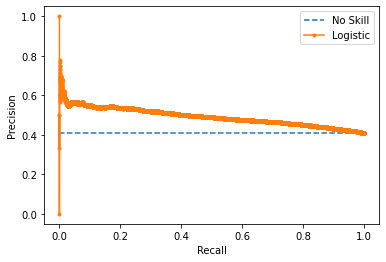

In [58]:
# predict probabilities
lr_probs = model_base.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_base.predict(X_test)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [60]:
from sklearn import metrics

metrics.confusion_matrix(y_test, y_pred)

array([[12049,   130],
       [ 8236,   174]], dtype=int64)

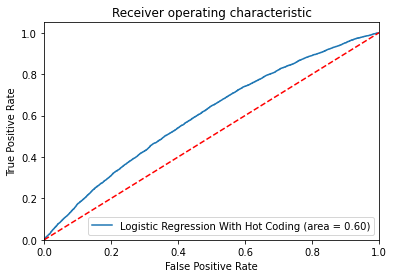

In [62]:
probs = model_base.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression With Hot Coding (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

With a large imbalanced data, we want to look at precision and recall value instread. the F1 socre for this hot coding logistric regession model is 0.04

model gives the wrong prediction of the negative class (predicted-positive, actual-negative). In the above example, 130 people are predicted as positive of reamitting to hospital, although they did not. TYPE I error.

model wrongly predicts the positive class (predicted-negative, actual-positive). In the above example, 8236 people who amitted to hospital are predicted as negative. FN is also called a TYPE II error.


## Imporve Model Accuracy with Labal Encoding - failed

### Label encode categorical variables.

In [64]:
Ddata.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

In [65]:
mappings = []

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

label_df = Ddata.drop('readmitted', axis=1)
for i, col in enumerate(label_df):
    if label_df[col].dtype == 'object':
        label_df[col] = label_encoder.fit_transform(numpy.array(label_df[col].astype(str)).reshape((-1,)))
        
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

In [66]:
label_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed
0,2,0,15,0,0,3,59,0,18,0,...,1,0,0,3,1,0,0,0,1,1
1,0,0,25,0,0,2,11,5,13,2,...,1,0,0,1,1,0,0,0,0,1
2,2,1,35,0,0,2,44,1,16,0,...,1,0,0,3,1,0,0,0,1,1
3,2,1,45,0,0,1,51,0,8,0,...,1,0,0,2,1,0,0,0,1,1
4,2,1,55,0,0,3,31,6,16,0,...,1,0,0,2,1,0,0,0,0,1


In [67]:
#Split data in 70:30
X_train, X_test, y_train, y_test = train_test_split(label_df, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48041, 38), (20589, 38), (48041,), (20589,))

### Scale the data

In [68]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
clf = LogisticRegression(C=0.001)
model_base = clf.fit(X_train, y_train)

y_pred = model_base.predict(X_test)
model_base.score(X_test, y_test)

print("Model accuracy is", model_base.score(X_test, y_test))

Model accuracy is 0.5914808878527369


In [70]:
metrics.confusion_matrix(y_test, y_pred)

array([[12174,     5],
       [ 8406,     4]], dtype=int64)

Logistic: f1=0.001 auc=0.473


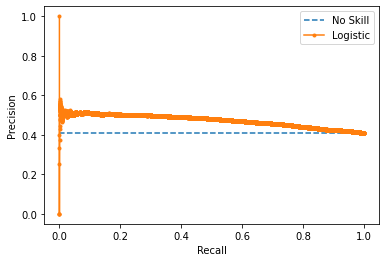

In [71]:
# predict probabilities
lr_probs = model_base.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model_base.predict(X_test)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

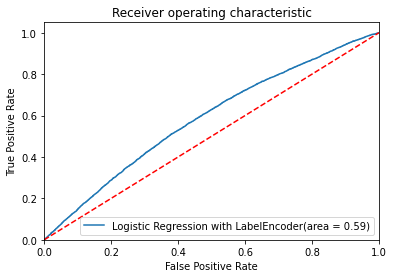

In [72]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

probs = model_base.predict_proba(X_test)
preds = probs[:,1]
labelfpr, labeltpr, labelthreshold = metrics.roc_curve(y_test, preds)
label_roc_auc = metrics.auc(labelfpr, labeltpr)

plt.figure()
plt.plot(labelfpr, labeltpr, label='Logistic Regression with LabelEncoder(area = %0.2f)' % label_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The F1 score for this model is extremely low at 0.001.

model gives the wrong prediction of the negative class (predicted-positive, actual-negative). In the above example, 5 people are predicted as positive of reamitting to hospital, although they did not. TYPE I error.

model wrongly predicts the positive class (predicted-negative, actual-positive). In the above example, 8406 people who amitted to hospital are predicted as negative. FN is also called a TYPE II error.

This model (after scaling and label encoding) tends to have a lower TYPE II error but higher TYPE I error.
Although the model acurary is relatively lower.

## Imporve Model Accuracy with GridSearchCV - suceeded 

In [73]:
# Split feature and label sets to train and data sets using hot coding dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((54904, 100), (13726, 100), (54904,), (13726,))

In [74]:
# Normalize using MinMaxScaler to constrain values to between 0 and 1.

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [76]:
# Create param grid.

param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000]}

# Create grid search object

clf = GridSearchCV(LogisticRegression(penalty= 'l2',max_iter=10000),param_grid, cv = 5, verbose=True, n_jobs=-1)
best_model = clf.fit(X_train,y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [77]:
y_pred = best_model.predict(X_test)

In [78]:
print("Model accuracy is", best_model.score(X_test,y_test))

Model accuracy is 0.6296808975666618


In [79]:
metrics.confusion_matrix(y_test, y_pred)

array([[7212,  922],
       [4161, 1431]], dtype=int64)

In [81]:
y_pred1 = numpy.where(best_model.predict_proba(X_test)[:,1] > .4, 1, 0)
metrics.confusion_matrix(y_test, y_pred1)

array([[4879, 3255],
       [2192, 3400]], dtype=int64)

In [82]:
y_pred3 = numpy.where(best_model.predict_proba(X_test)[:,1] > .3, 1, 0)
metrics.confusion_matrix(y_test, y_pred3)

array([[1659, 6475],
       [ 487, 5105]], dtype=int64)

Logistic: f1=0.360 auc=0.558


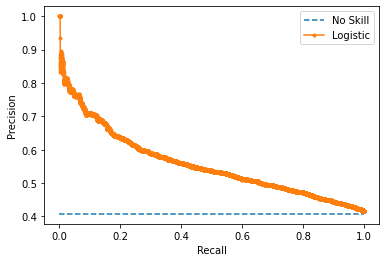

In [83]:
# predict probabilities
lr_probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = best_model.predict(X_test)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

GridSearchCV at 5 folds gives the best f1 scores among all tries at 0.36

# Part 2

## Classification Trees using DecisionTreeClassifier

### Import packages and reload the data

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [106]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=33adad7cc2d396f351108330a02a6ad7fbb3e9fe9b019f63fee24207c74a19f1
  Stored in directory: c:\users\sijie li\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [107]:
from six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image

In [147]:
from sklearn import tree


In [323]:
X = Ddata2
y = Ddata['readmitted'].replace(("YES", "NO"), (1,0), inplace=True)
y = Ddata['readmitted']

In [324]:
y.value_counts()

0    40880
1    27750
Name: readmitted, dtype: int64

In [325]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((48041, 100), (20589, 100), (48041,), (20589,))

### Use GridSearchCV to find out the best parameters for decision tree

In [326]:
param_grid = {
    "max_depth":[3,4,5,6,7,8], "criterion": ('gini', 'entropy'), "splitter": ('best', 'random')
}

tree_specification = DecisionTreeClassifier() 
tree_specification_CV = GridSearchCV(tree_specification, param_grid, verbose=1, cv=5)
results=tree_specification_CV.fit(X_train,y_train)
print("The best parameter values are \n", results.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best parameter values are 
 {'criterion': 'gini', 'max_depth': 6, 'splitter': 'best'}


### Select important features based on their coef

In [327]:
fn=['discharge_disposition_id_11',
'number_diagnoses',
'diabetesMed',
'discharge_disposition_id_6',
'number_inpatient',
'admission_type_id_3',
'admission_type_id_5',
'time_in_hospital',
'age',
'diag_1_Neoplasms']

In [328]:
X_train = X_train[fn]
X_test = X_test[fn]

tree_dot = StringIO()

tree_clf = DecisionTreeClassifier(max_depth=6,criterion='gini',splitter='best') 
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test)
y_pred.reshape(1,-1).flatten
count = y_pred[y_pred==1].shape[0]
count

2150

In [329]:
metrics.confusion_matrix(y_test, y_pred)

array([[11375,   804],
       [ 7064,  1346]], dtype=int64)

Logistic: f1=0.255 auc=0.538


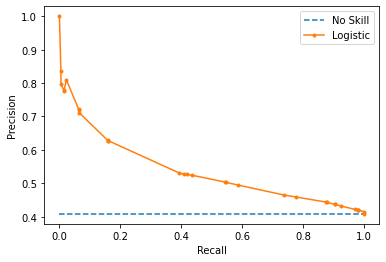

In [330]:
# predict probabilities
lr_probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = tree_clf.predict(X_test)
# calculate precision and recall for each threshold
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [331]:
print("Model accuracy is", tree_clf.score(X_test,y_test))

Model accuracy is 0.6178541939870805


F1 socre is 0.255 with AUC at 0.538. Model accuracy at 0.62

In [253]:
import os
my_path = os.path.abspath(r'C:\Users\Sijie Li\OneDrive - The University of Chicago\Documents\MSCA\Winter2021\MsCA31008 DataMining')

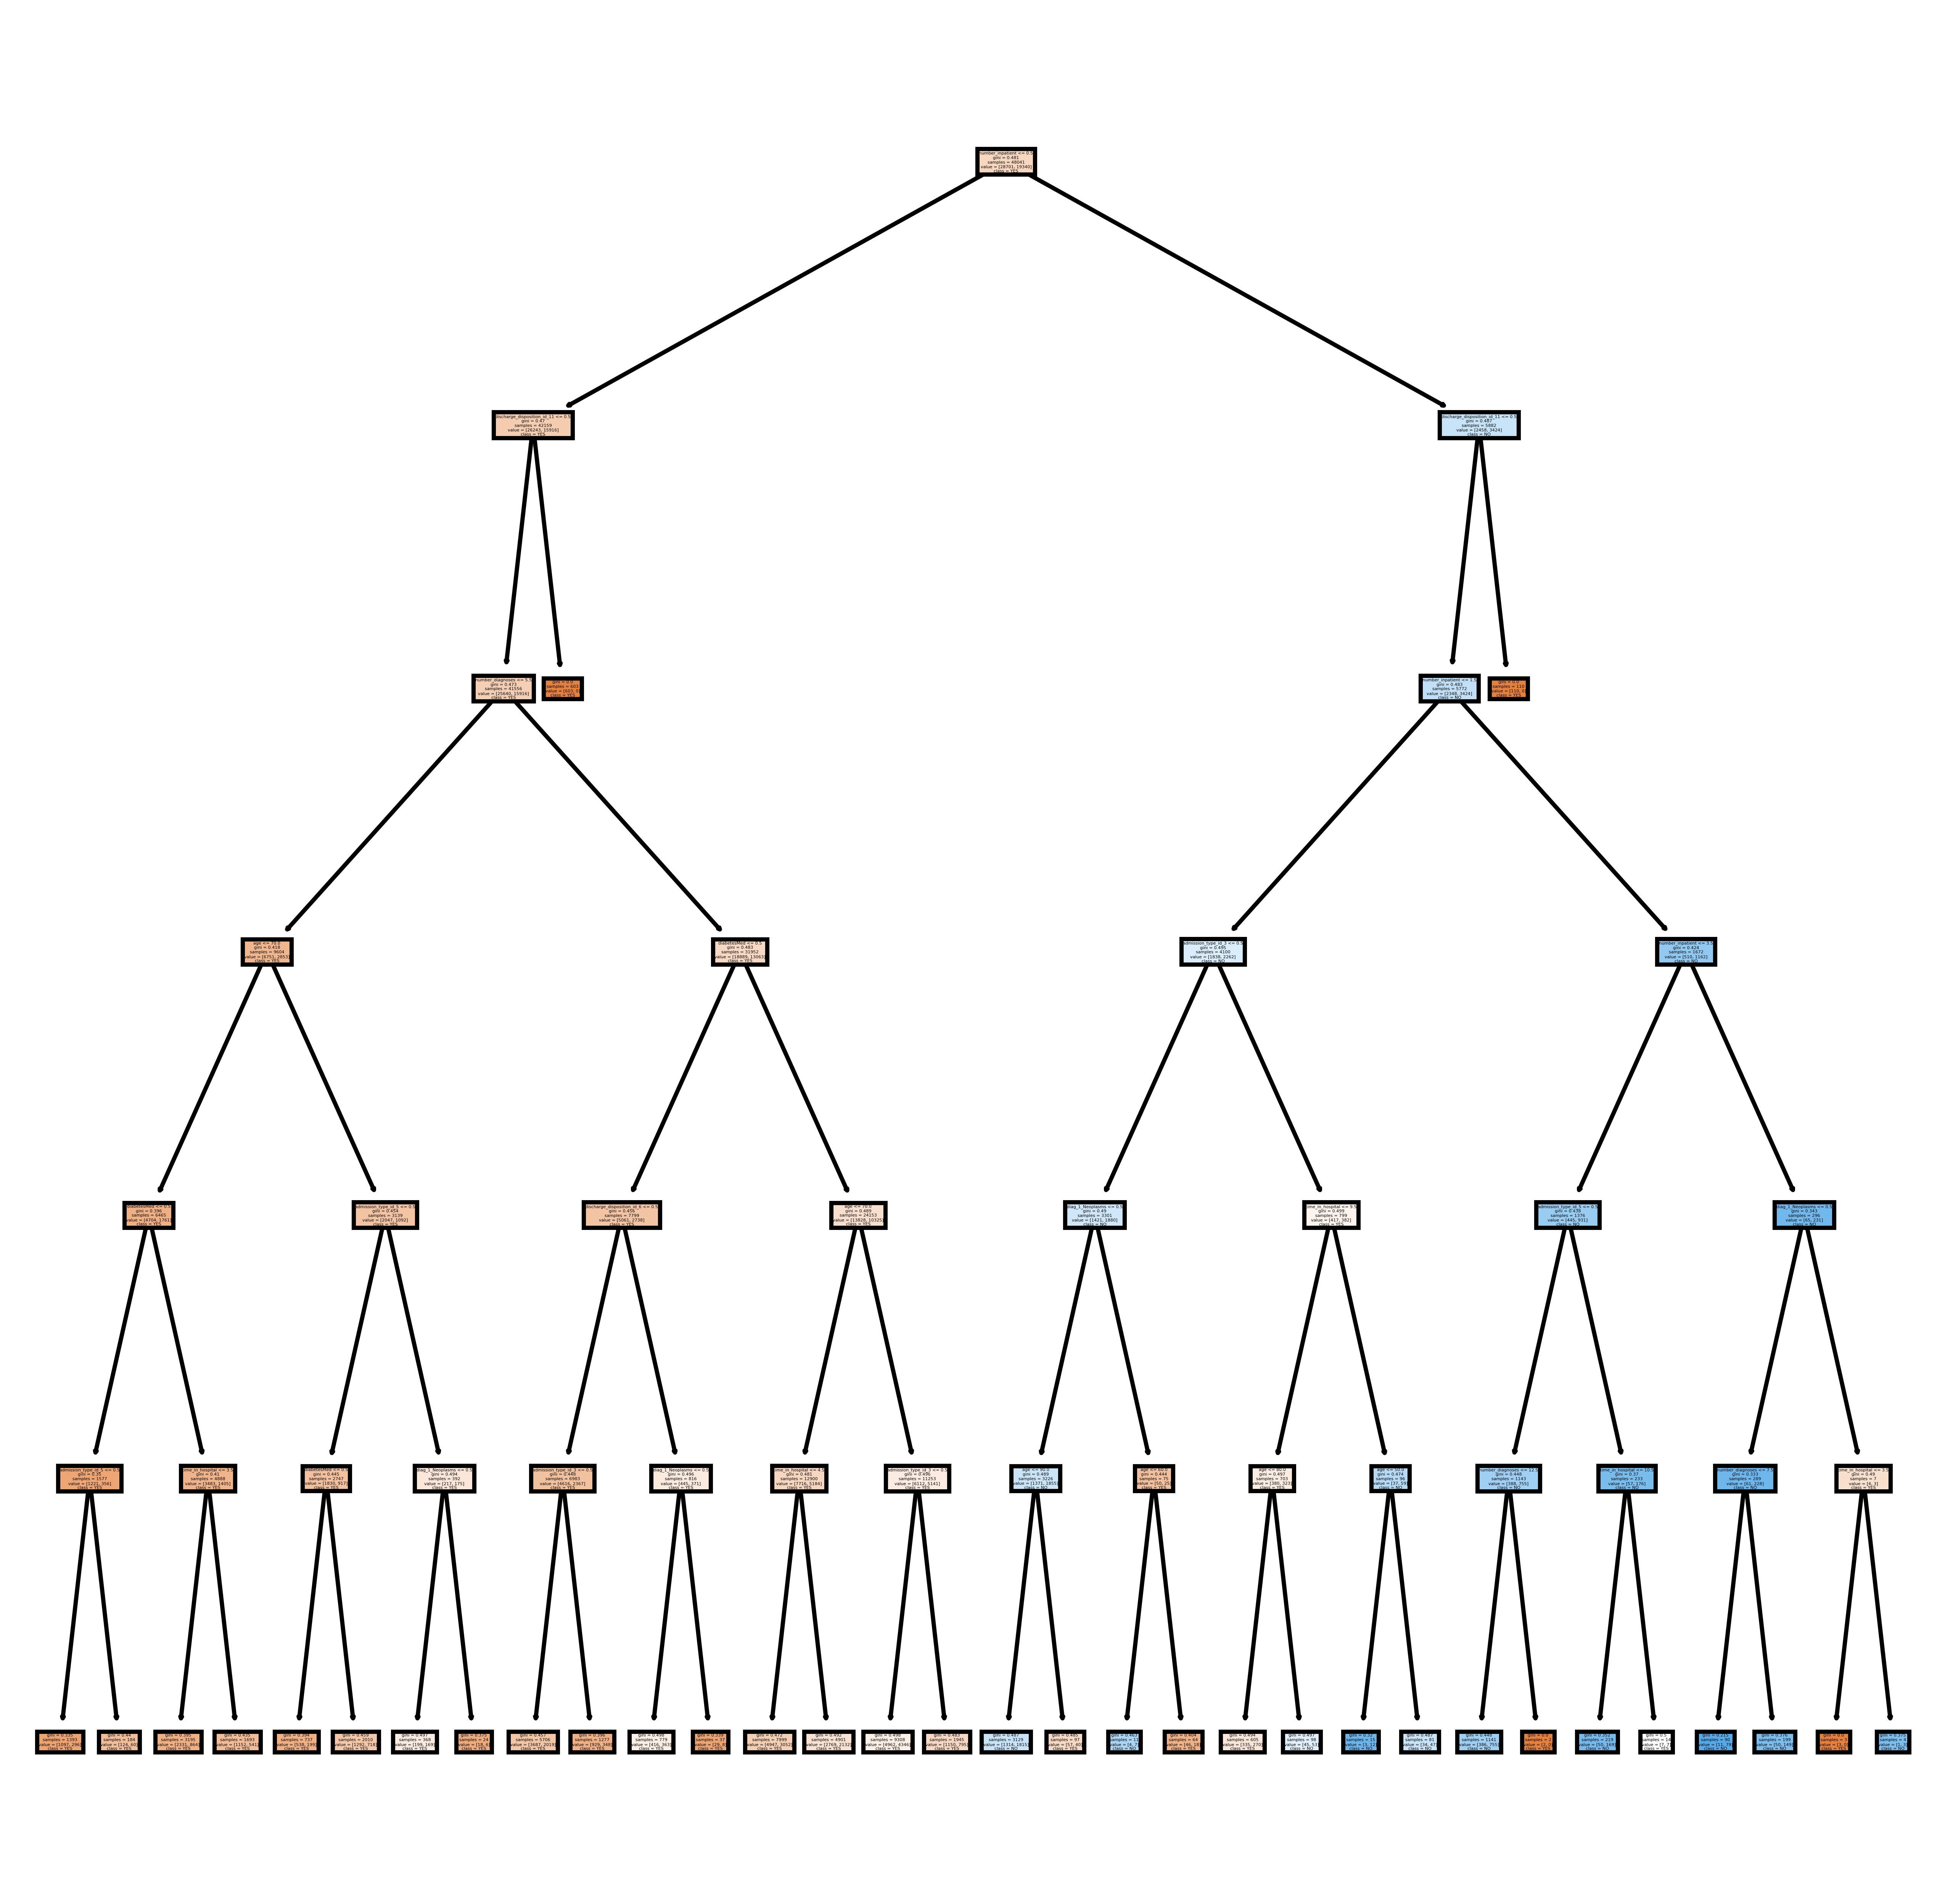

In [300]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=800)
tree.plot_tree(tree_clf,
               feature_names =fn, 
               class_names=y,
               filled = True);
fig.savefig(my_path + 'decisiontree.png')

### Decision tree interpretation:
Unfortunately there is no terminal code formed in such depth. The highst gini index is at 0.5. All of the code demand for further splits. 

### Compare the confusion matrixes against logistic regession

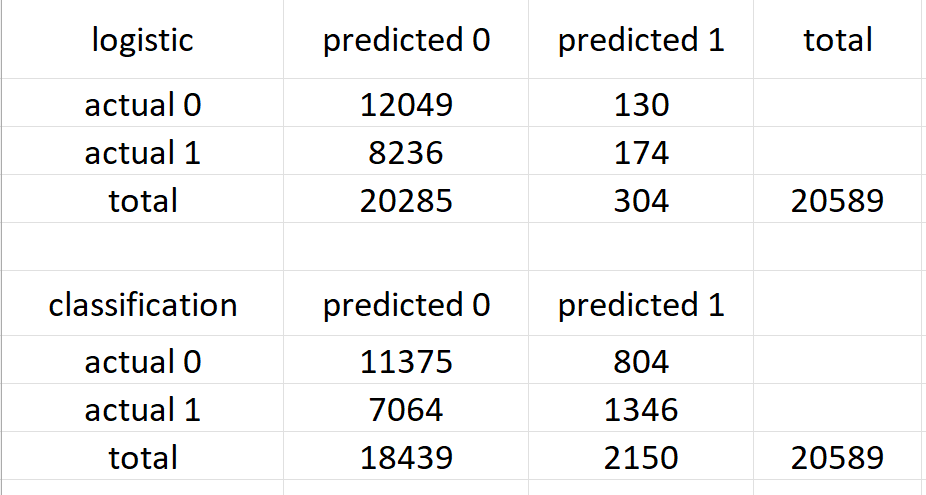

In general, classification model is more stable with true predictions (TP,TN), but with more type I error. logistric regerssion however, in terms of f1 score, it is extremly low at 0.04 compare to classification (0.26).

Might need to resample the training set to improve the prediction on logistic regression. 